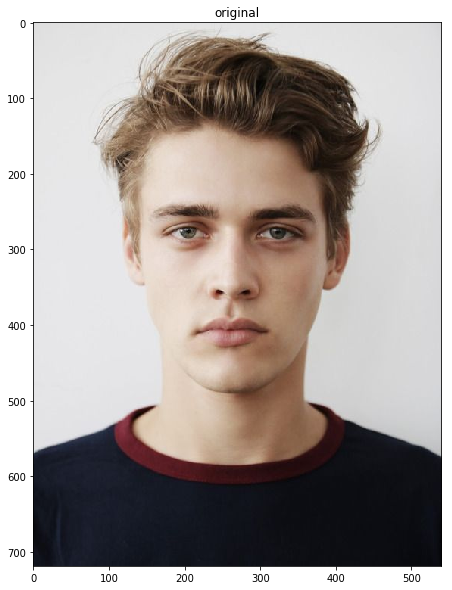

SystemError: <built-in function calcHist> returned NULL without setting an error

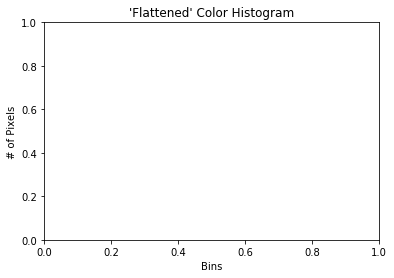

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import MiniBatchKMeans

def print_histogram(img):
    '''
    Print color histogram
    '''
    chans = cv2.split(img)
    colors = ("b", "g", "r")
#     plt.figure(figsize=(20,10))
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    features = []
    max_color = 16
    
#     b,g,r = cv2.split(img)
    
#     plt.hist(b.ravel(), 64, [0,256])
#     plt.grid(True)
#     plt.show()
    
#     plt.hist(g.ravel(), 64, [0,256])
#     plt.grid(True)
#     plt.show()
    
#     plt.hist(r.ravel(), 64, [0,256])
#     plt.grid(True)
#     plt.show()
    
    
#     # loop over the image channels
#     for (chan, color) in zip(chans, colors):
#         # create a histogram for the current channel and
#         # concatenate the resulting histograms for each
#         # channel
#         hist = cv2.calcHist([chan], [0], None, histSize=16, [0, 256])
#         features.extend(hist)

#         # plot the histogram
#         plt.plot(hist, color = color)
#         plt.xlim([0, max_color])

    color = ('b','g','r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img],[i], mask=None, histSize=16,ranges=[0,256])
        plt.plot(histr, color = col)
        plt.xlim([0,256])
    
    plt.show()

def blur_image(img): 
    """
    Blur image by applying convolution filter
    """
   
    # average kernels
#     kernel = np.ones((7,7),np.float32)/49    
    kernel = np.ones((5,5),np.float32)/25
#     kernel = np.ones((3,3),np.float32)/9

    # gaussian kernels
#     kernel = cv2.getGaussianKernel(5, 2)
    blur = cv2.filter2D(img, -1, kernel)

#     blur = cv2.GaussianBlur(img, (7,7), 0)
#     blur = cv2.blur(img,(7,7))
    
#     blur = cv2.medianBlur(img, 5)

#     plt.hist(img.ravel(),254,[0,254])
#     plt.show()

#     plt.hist(blur.ravel(),254,[0,254])
#     plt.show()

    return blur

def quantize_color(blur):
    # load the image and grab its width and height
    image = blur
    (h, w) = image.shape[:2]

    # convert the image from the RGB color space to the L*a*b*
    # color space -- since we will be clustering using k-means
    # which is based on the euclidean distance, we'll use the
    # L*a*b* color space where the euclidean distance implies
    # perceptual meaning
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # reshape the image into a feature vector so that k-means
    # can be applied
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # apply k-means using the specified number of clusters and
    # then create the quantized image based on the predictions
    clt = MiniBatchKMeans(n_clusters = 16)
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    # reshape the feature vectors to images
    quant = quant.reshape((h, w, 3))
    image = image.reshape((h, w, 3))

    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    # display the images and wait for a keypress
#     cv2.imshow("image", np.hstack([image, quant]))
#     cv2.waitKey(0)
    return quant, image

def print_image(title, img):
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.imshow(img)
    plt.show()
    plt.clf()

def reduce_color(image_file):
    '''
    There are 2 steps:
    - apply convolutions to reduce color space
    - quantize colors
    '''
    img = cv2.imread(image_file, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print_image('original', img)
#     for i in range(20):
#         blur = blur_image(img)
    print_histogram(img)
    
    # blur image
    blur = blur_image(img)    
#     blur = img
    print_image('blur', blur)
    print_histogram(blur)
    
    # quantize
    quant, image = quantize_color(blur)
    print_image('quantized', quant)
    print_histogram(quant)
    
def main():
#     reduce_color('landscape.jpg')
    reduce_color('boy.jpg')
    reduce_color('peppers2.png')
    
main()